Requirements: 
- !pip install matplotlib seaborn
- csv files within a folder called data/02_waterquality_timeseries/*.csv

In [ ]:
!pip install matplotlib seaborn

In [19]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

## Create metadata including available variables for each gage

In [ ]:
def build_wc_var_availability_df(timeseries_dir, include_flags=False):
    """
    Build water-quality variable availability by gage as a wide boolean table.

    Returns
    -------
    pandas.DataFrame
        Columns:
        - STREAM_ID
        - one column per variable (True/False)
    """
    timeseries_dir = Path(timeseries_dir)

    per_gage_vars = {}
    all_vars = set()

    for csv_path in sorted(timeseries_dir.glob("*.csv")):
        columns = pd.read_csv(csv_path, nrows=0).columns.tolist()

        wc_vars = set()
        for col in columns:
            if col == "DateTime":
                continue
            if not include_flags and col.startswith("Flag_"):
                continue
            wc_vars.add(col)

        stream_id = csv_path.stem
        per_gage_vars[stream_id] = wc_vars
        all_vars.update(wc_vars)

    ordered_vars = sorted(all_vars)

    rows = []
    for stream_id in sorted(per_gage_vars):
        row = {"STREAM_ID": stream_id}
        gage_vars = per_gage_vars[stream_id]
        for var in ordered_vars:
            row[var] = var in gage_vars
        rows.append(row)

    ordered_vars = sorted(v for v in all_vars if v != "DateTime_UTC")
    
    return pd.DataFrame(rows, columns=["STREAM_ID"] + ordered_vars)



In [15]:
df_wc = build_wc_var_availability_df("data/02_waterquality_timeseries")
df_wc

,STREAM_ID,Chla_ugL,DO_mgL,NO3_mgNL,PC_RFU,SpC_uScm,Turb_FNU,Turb_NTU,WTemp_C,fDOM_QSU,fDOM_RFU,pH
0,STREAM-gauge-1616,False,False,False,False,False,False,False,True,False,False,False
1,STREAM-gauge-1617,False,True,False,False,True,True,False,True,False,False,True
2,STREAM-gauge-1618,True,True,False,True,True,False,False,True,False,False,True
3,STREAM-gauge-1619,False,False,False,False,False,False,False,True,False,False,False
4,STREAM-gauge-1620,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
532,STREAM-gauge-2176,False,False,False,False,False,False,False,False,False,False,True
533,STREAM-gauge-2177,False,True,False,False,True,False,False,True,False,False,True
534,STREAM-gauge-2178,False,True,False,False,True,False,False,True,False,False,True
535,STREAM-gauge-2179,False,True,False,False,True,False,False,True,False,False,True


Visualize the variable coverage across sites

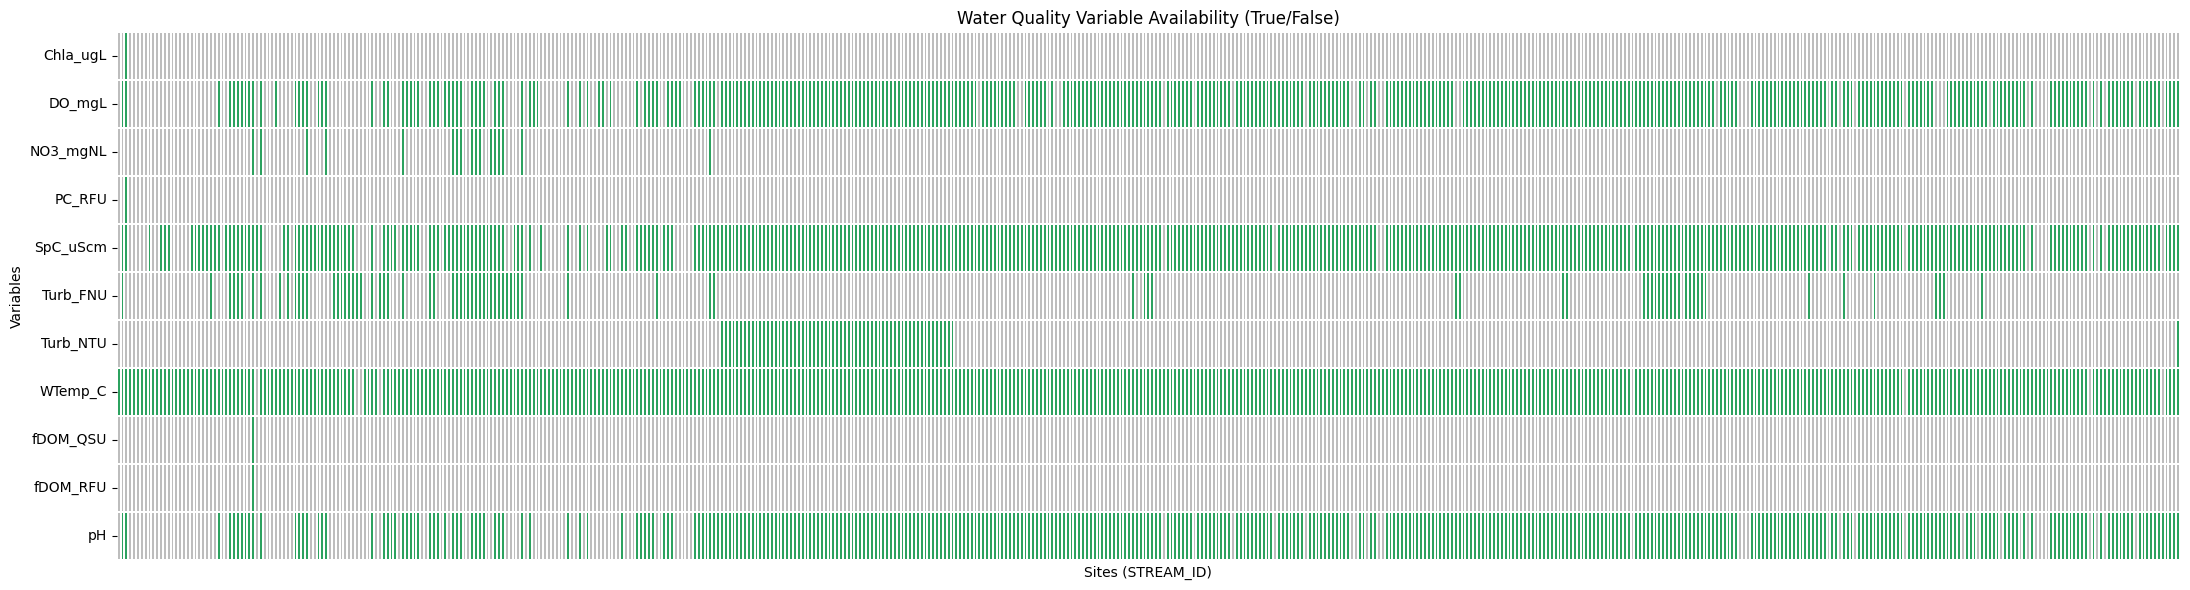

In [20]:
# columns to plot
vars_cols = [c for c in df_wc.columns if c != "STREAM_ID"]

# matrix: rows=variables, cols=sites
mat = (
    df_wc.set_index("STREAM_ID")[vars_cols]
    .T
    .astype(int)  # False->0, True->1
)

plt.figure(figsize=(22, 6))
cmap = ListedColormap(["#bdbdbd", "#2ca25f"])  # gray=false, green=true
sns.heatmap(
    mat,
    cmap=cmap,
    cbar=False,
    linewidths=0.2,
    linecolor="white"
)

plt.xlabel("Sites (STREAM_ID)")
plt.ylabel("Variables")
plt.title("Water Quality Variable Availability (True/False)")
plt.xticks([], [])  # too many sites; hide tick labels
plt.tight_layout()
plt.show()

In [ ]:
#df_wc.to_csv("data/wc_vars_by_gage.csv", index=False)